Importamos librerías

In [1]:
import pandas as pd
import pyarrow.parquet as pq
import pyarrow as pa
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from itertools import cycle
from sklearn.preprocessing import LabelEncoder
import ast

Lectura del archivo gamesETL

In [2]:
#Leemos el archivo reviews.parquet en un DataFrame
gamesdf = pq.read_table("../0-DATA/output_steam_gamesETL.parquet").to_pandas()
gamesdf.head(5)

,genres,app_name,price,id,developer,Año_estreno
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,4.99,761140.0,Kotoshiro,2018
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,0.00,643980.0,Secret Level SRL,2018
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,0.00,670290.0,Poolians.com,2017
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,0.99,767400.0,彼岸领域,2017
4,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,3.99,772540.0,Trickjump Games Ltd,2018


In [3]:
gamesdf.describe()

,price,id
count,27462.000000,2.746200e+04
mean,9.010884,4.417591e+05
std,15.987402,1.860059e+05
min,0.000000,1.000000e+01
25%,2.990000,3.173525e+05
50%,4.990000,4.371950e+05
75%,9.990000,5.875075e+05
max,995.000000,2.028850e+06


In [4]:
gamesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27462 entries, 0 to 27461
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   genres       27462 non-null  object 
 1   app_name     27462 non-null  object 
 2   price        27462 non-null  float64
 3   id           27462 non-null  float64
 4   developer    27462 non-null  object 
 5   Año_estreno  27459 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1.3+ MB


### Analisis de la columnas

'Año_estreno'

In [5]:
gamesdf.Año_estreno.unique()# vemos que existen datos tipo string

array(['2018', '2017', '1997', '1998', '2016', '2006', '2005', '2003',
       '2007', '2002', '2000', '1995', '1996', '1994', '2001', '1993',
       '2004', '2008', '2009', '1999', '1992', '1989', '2010', '2011',
       '2013', '2012', '2014', '1983', '1984', '2015', '1990', '1988',
       '1991', '1987', '1986', None, '2021', '2019', '1985'], dtype=object)

Eliminamos esta columna ya que los juegosen consola empiezan con fuerza desde el año 2010

In [6]:
#eliminamos el index antiguo que se convirtion en una columna
gamesdf = gamesdf.drop('Año_estreno', axis=1)
gamesdf.head(5)

,genres,app_name,price,id,developer
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,4.99,761140.0,Kotoshiro
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,0.00,643980.0,Secret Level SRL
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,0.00,670290.0,Poolians.com
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,0.99,767400.0,彼岸领域
4,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,3.99,772540.0,Trickjump Games Ltd


'genres'

In [7]:
# obtenemos la cantidad de juegos por género
gamesdf["genres"].value_counts() # vemos que tenemos,en tipo lista, lo desanidaremos

genres
['Action']                                                                                                        1783
['Action', 'Indie']                                                                                               1571
['Simulation']                                                                                                    1361
['Casual', 'Simulation']                                                                                          1357
['Action', 'Adventure', 'Indie']                                                                                  1015
                                                                                                                  ... 
['Animation &amp; Modeling', 'Audio Production', 'Design &amp; Illustration', 'Utilities', 'Video Production']       1
['Adventure', 'Free to Play', 'Indie', 'RPG', 'Strategy', 'Early Access']                                            1
['Adventure', 'Casual', 'RPG', 'Simulatio

In [8]:
gamesdf['genres'] = gamesdf['genres'].apply(ast.literal_eval) # convetimos nuestra solumna a lista

In [9]:
#creamos esta funcion para desanidad la lista
def clean_genres(genres):
    if isinstance(genres, list):
        return genres[0]
    elif isinstance(genres, str):
        return genres
    else:
        return 'Sin classification2'

In [10]:
# Aplicamos la función a la columna 'genres' y creamos una nueva columna 'genres_clean'
gamesdf['genres_clean'] = gamesdf['genres'].apply(clean_genres)
gamesdf.head(3)

,genres,app_name,price,id,developer,genres_clean
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,4.99,761140.0,Kotoshiro,Action
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,0.00,643980.0,Secret Level SRL,Free to Play
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,0.00,670290.0,Poolians.com,Casual


In [11]:
#eliminamos la columna generos
gamesdf = gamesdf.drop(columns=["genres"])
gamesdf.head(3)

,app_name,price,id,developer,genres_clean
0,Lost Summoner Kitty,4.99,761140.0,Kotoshiro,Action
1,Ironbound,0.00,643980.0,Secret Level SRL,Free to Play
2,Real Pool 3D - Poolians,0.00,670290.0,Poolians.com,Casual


In [12]:
gamesdf["genres_clean"].value_counts()

genres_clean
Action                       10637
Casual                        4254
Adventure                     4118
Indie                         3152
Simulation                    1803
Strategy                      1094
RPG                            635
Free to Play                   478
Racing                         437
Design &amp; Illustration      322
Animation &amp; Modeling       168
Utilities                       83
Audio Production                73
Sports                          56
Education                       46
Massively Multiplayer           39
Software Training               21
Video Production                20
Photo Editing                    8
Accounting                       7
Web Publishing                   7
Early Access                     4
Name: count, dtype: int64

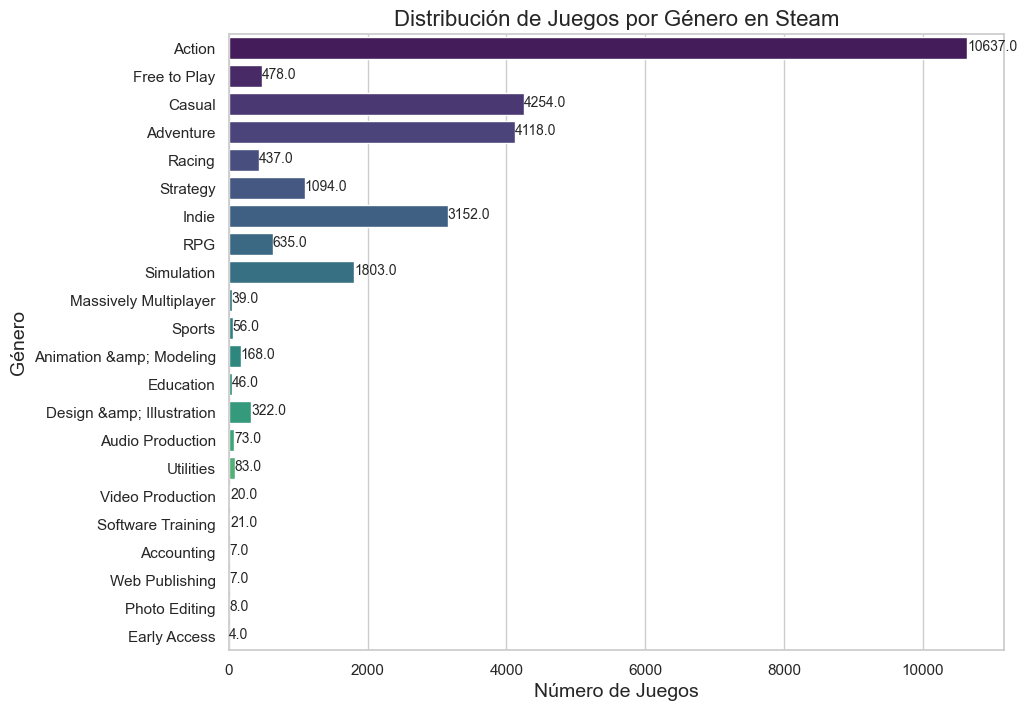

In [13]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
ax = sns.countplot(data=gamesdf, y='genres_clean', orient='h', palette='viridis')

ax.set_title('Distribución de Juegos por Género en Steam', fontsize=16)
ax.set_xlabel('Número de Juegos', fontsize=14)
ax.set_ylabel('Género', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 0.1, p.get_y() + 0.5), fontsize=10)

plt.show()

#Los generos con mayor cantidad de juegos son: Action, Casual , Adventure, Indie y Simulation

'id'

In [14]:
n_valor_unico = len(gamesdf.id.unique())
n_valor_unico

27461

'developer'

In [15]:

developer = gamesdf["developer"].value_counts() # obtenemos la cantidad de juegos por desarrollador
developer

developer
Ubisoft - San Francisco       1258
SmiteWorks USA, LLC            812
Dovetail Games                 253
KOEI TECMO GAMES CO., LTD.     215
Paradox Development Studio     153
                              ... 
Triple rush games                1
Storybird,Julien Rocca           1
Light                            1
Jorge Vera Blasco                1
Bidoniera Games                  1
Name: count, Length: 10603, dtype: int64

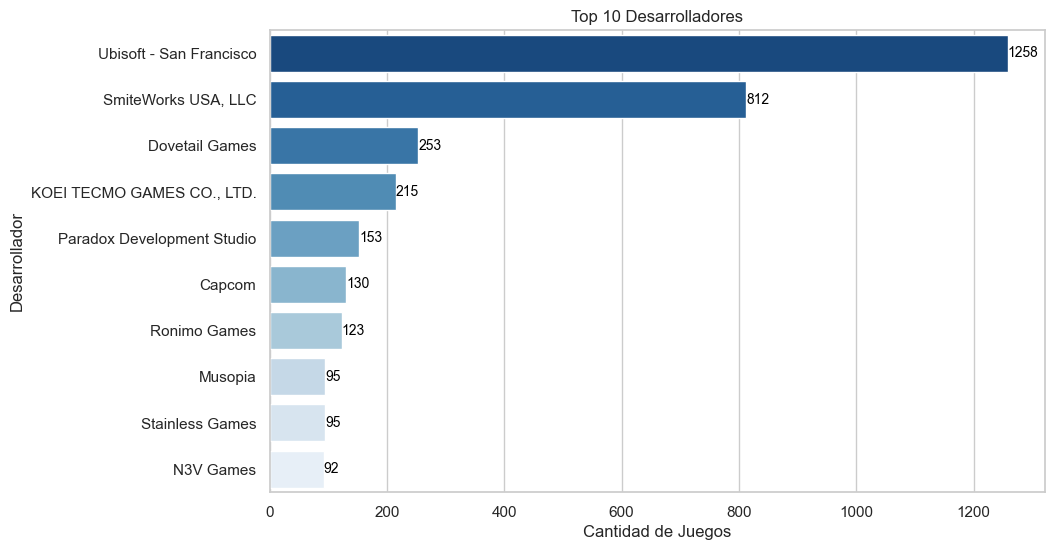

In [16]:
# Creamos un gráfico de barras horizontales
sns.set(style="whitegrid")

# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 6))

developer_data = developer[:10]
sns.barplot(x=developer_data.values, y=developer_data.index, palette="Blues_r")
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Desarrollador')
plt.title('Top 10 Desarrolladores')

# Añadimos etiquetas en las barras
for i, v in enumerate(developer_data.values):
    plt.text(v + 0.1, i, str(v), color='black', va='center', fontsize=10)

# Los mayores desarrolladores de juegos es ´Ubisoft - San Francisco´ con 1258 juegos y ´SmiteWorks USA, LLC´ con 812 juegos en Steam.

'price'

In [17]:
#la compra se hace aleatoriamente.
precio = gamesdf["price"].value_counts() # obtenemos la cantidad de juegos por desarrollador
precio.head(25)

price
4.99     3829
9.99     3568
2.99     3155
0.99     2458
1.99     2245
19.99    1565
0.00     1539
3.99     1408
14.99    1384
6.99     1101
7.99     1006
5.99      861
29.99     473
12.99     378
24.99     366
8.99      313
11.99     303
39.99     276
49.99     155
34.99     104
59.99      93
17.99      84
16.99      83
15.99      76
13.99      76
Name: count, dtype: int64

'app_name', 

In [18]:
nombres = gamesdf["app_name"].value_counts() # obtenemos la cantidad de juegos por desarrollador
nombres.head()

app_name
Soundtrack                 3
Ultimate Arena             2
Solitaire                  2
New York Bus Simulator     2
Total Extreme Wrestling    2
Name: count, dtype: int64

In [19]:
gamesdf.columns

Index(['app_name', 'price', 'id', 'developer', 'genres_clean'], dtype='object')

Reseteamos los indices

In [20]:
#Reseteamos los indices
gamesdf.reset_index(inplace=True)
gamesdf.head(3)

,index,app_name,price,id,developer,genres_clean
0,0,Lost Summoner Kitty,4.99,761140.0,Kotoshiro,Action
1,1,Ironbound,0.00,643980.0,Secret Level SRL,Free to Play
2,2,Real Pool 3D - Poolians,0.00,670290.0,Poolians.com,Casual


In [21]:
#eliminamos el index antiguo que se convirtion en una columna
gamesdf = gamesdf.drop('index', axis=1)
gamesdf.head(5)

,app_name,price,id,developer,genres_clean
0,Lost Summoner Kitty,4.99,761140.0,Kotoshiro,Action
1,Ironbound,0.00,643980.0,Secret Level SRL,Free to Play
2,Real Pool 3D - Poolians,0.00,670290.0,Poolians.com,Casual
3,弹炸人2222,0.99,767400.0,彼岸领域,Action
4,Battle Royale Trainer,3.99,772540.0,Trickjump Games Ltd,Action


Guardando por los cambios generados

In [22]:
tabla = pa.Table.from_pandas(gamesdf) # convertimos el dataframe en una tabla de pyarrow
pq.write_table(tabla,"../0-DATA/output_steam_gamesEDA.parquet") # guardamos la tabla en formato parquet

In [23]:
gamesdf.to_csv("../0-DATA/output_steam_gamesEDA.csv", index=False, encoding="utf-8") 

Asi quedo nuestro DF

In [24]:
gamesdf

,app_name,price,id,developer,genres_clean
0,Lost Summoner Kitty,4.99,761140.0,Kotoshiro,Action
1,Ironbound,0.00,643980.0,Secret Level SRL,Free to Play
2,Real Pool 3D - Poolians,0.00,670290.0,Poolians.com,Casual
3,弹炸人2222,0.99,767400.0,彼岸领域,Action
4,Battle Royale Trainer,3.99,772540.0,Trickjump Games Ltd,Action
...,...,...,...,...,...
27457,Kebab it Up!,1.99,745400.0,Bidoniera Games,Action
27458,Colony On Mars,1.99,773640.0,"Nikita ""Ghost_RUS""",Casual
27459,LOGistICAL: South Africa,4.99,733530.0,Sacada,Casual
27460,Russian Roads,1.99,610660.0,Laush Dmitriy Sergeevich,Indie
